In [1]:
#Boston Housing Dataset: Load the boston dataset.
from sklearn.datasets import load_boston
boston = load_boston()
import pandas as pd

df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['target'] = pd.Series(boston.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
df_boston.shape

(506, 14)

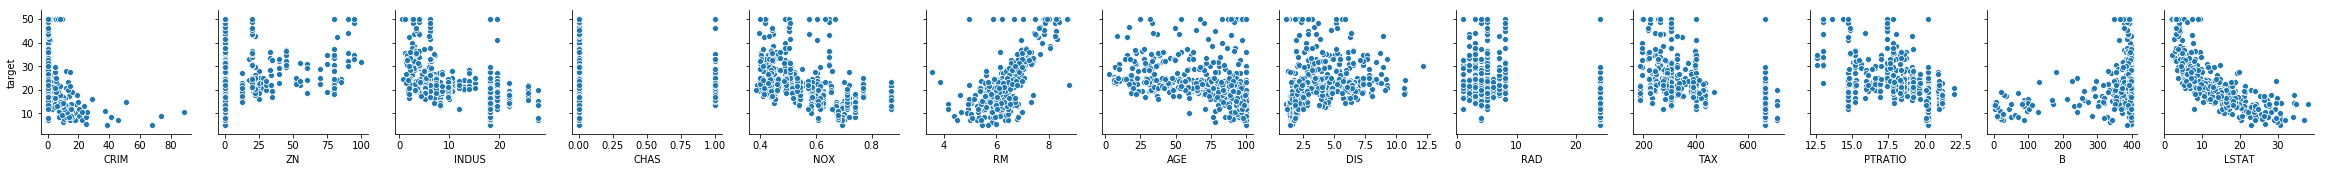

In [3]:
# visualize the relationship between the features and the response using scatterplots
%matplotlib inline
import seaborn as sns
sns.pairplot(df_boston, x_vars=boston.feature_names, y_vars='target')

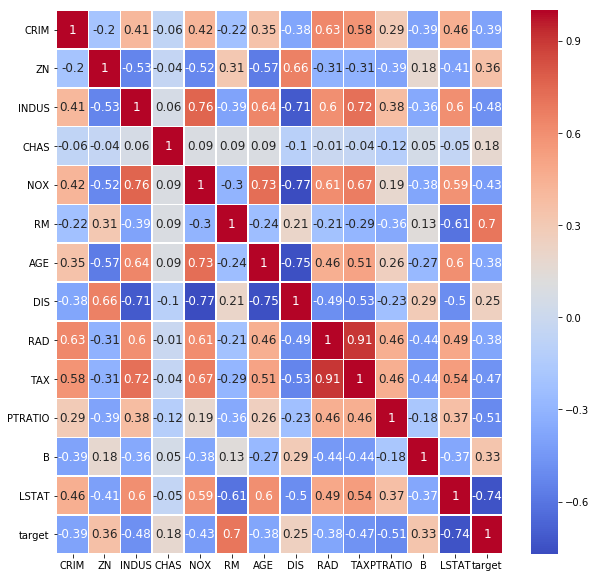

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#We can visualise the correlation between all the variables in the dataset using a heatmap in Seaborn
plt.figure(figsize = (10,10))
sns.heatmap(data=df_boston.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np

# Separate features and target variables
y = df_boston.iloc[:,-1]

#choose your approach:
#X = df_boston.iloc[:,:-1] #if I want to use all variables
#X = df_boston.iloc[:,[4,5,10,11,12]] #if I want to use only some variable
#X.LSTAT = np.log(X.LSTAT) #if I want to log transform the LSTAT variable 
#X = X.drop(['INDUS','CHAS','AGE','B'], axis=1) #if I want to drop some columns

columns = X.columns #column names

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False).fit(X)
scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=123)


#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.linear_model import LinearRegression
import numpy as np

regressor = LinearRegression() #(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)[source]¶
parameters = {}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters,cv=3) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#test on hold-out

#gs.score(X_train, y_train)
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.716981 using {}
0.716981 (0.057489) with: {}


0.5749793784664502

Text(0.5,1,'Prices vs Predicted prices: $y_i$ vs $\\hat{y}_i$')

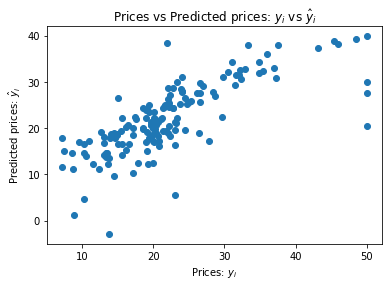

In [20]:
plt.scatter(y_test, gs.predict(X_test))
plt.xlabel("Prices: $y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")

In [8]:
#Independent term in the linear model.
print('Intercept: ', gs.best_estimator_.intercept_)

import pandas as pd
pd.DataFrame(list(zip(columns,gs.best_estimator_.coef_)), columns = ['features','estimatedCoefficients'])

Intercept:  22.529391438757806


,features,estimatedCoefficients
0,NOX,0.014580
1,RM,3.903022
2,PTRATIO,-2.018229
3,B,0.649437
4,LSTAT,-3.417030


In [10]:
from sklearn.metrics import mean_squared_error
print("MSE train: ", mean_squared_error(y_train, gs.predict(X_train)))
print("MSE test: ", mean_squared_error(y_test, gs.predict(X_test)))

MSE train:  23.406933579335075
MSE test:  34.353605759990195


In [11]:
from sklearn.metrics import mean_absolute_error
print("MAE train: ", mean_absolute_error(y_train, gs.predict(X_train)))
print("MAE test: ", mean_absolute_error(y_test, gs.predict(X_test)))

MAE train:  3.2750063584487465
MAE test:  4.035961002176882


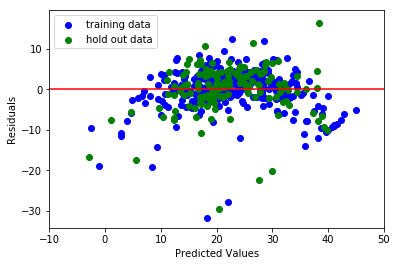

In [12]:
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

X_train = sm.add_constant(X_train)
#If we do want to add a constant to our model — we have to set it by using the command X = sm.add_constant(X) where X is the name of your data frame containing your input (independent) variables.
est = sm.OLS(y_train, X_train)
est_fit = est.fit()
print(est_fit.summary())

C:\Users\claud\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     185.5
Date:                Tue, 27 Nov 2018   Prob (F-statistic):           7.70e-96
Time:                        17:25:37   Log-Likelihood:                -1060.4
No. Observations:                 354   AIC:                             2133.
Df Residuals:                     348   BIC:                             2156.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5294      0.260     86.581      0.0